In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

olivetti_faces = fetch_openml("olivetti_faces", as_frame=False ,parser='auto')
X, y = olivetti_faces.data, olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=80, stratify=y_train, random_state=43)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
print(pca.n_components_)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)
199


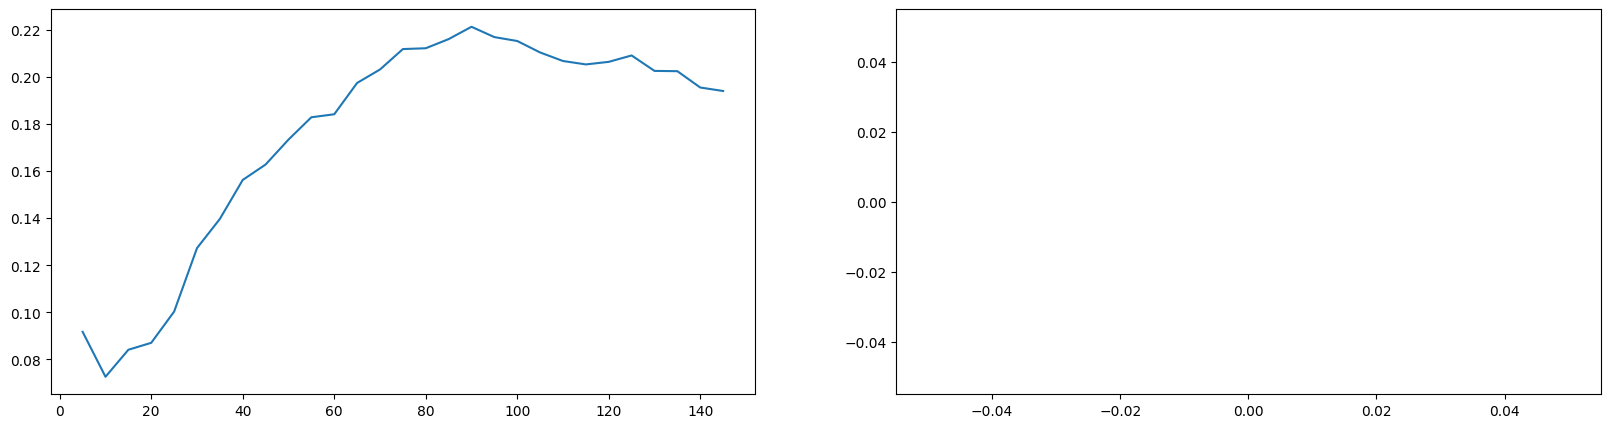

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
inertia_scores = []
kmeans_per_k = []
k_range = range(5, 150, 5)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
inertia_scores = [inertia_scores.append(k_means.inertia_) for model in kmeans_per_k]
    
figure, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5)) 
axis1.plot([i for i in k_range], silhouette_scores)
axis2.plot([i for i in k_range], inertia_scores )
plt.show()

In [44]:
best_index = np.argmax(silhouette_scores)
k_range = range(5, 150, 5)
best_index, len(k_range), len(silhouette_scores)
# best_k = k_range[best_index]

(56, 29, 29)

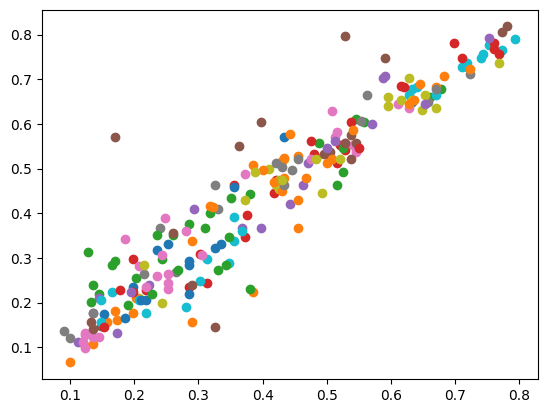

In [15]:
kmeans_16 = KMeans(n_clusters=39, n_init='auto', random_state=42)
labels = kmeans_16.fit_predict(X_train)

for i in np.unique(labels):
    plt.scatter(X_train[labels == i , 0] , X_train[labels == i , 1] , label = i)

In [ ]:

faces_train = [X_train[i].reshape(64, 64) for i in range(0, len(X_train-1))]
plt.imshow(faces_train[0]*255)